In [2]:
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

In [3]:
def plotData(x,y):
    pos = y==1
    neg = y==0
    print('Scatter plot of training data')
    #X(pos, 1), X(pos, 2)
    plt.figure(figsize=(8, 8))
    plt.scatter(x[pos,0], x[pos,1],c='black',marker='+',label='Admitted')
    plt.scatter(x[neg,0], x[neg,1],c='red',marker='o',label='Not Admitted')
    plt.ylabel('Exam 2 score'); # Set the y-axis label
    plt.xlabel('Exam 1 score'); # Set the x-axis label
    l=plt.legend()
    l.set_zorder(20)
    plt.show()

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.
Scatter plot of training data


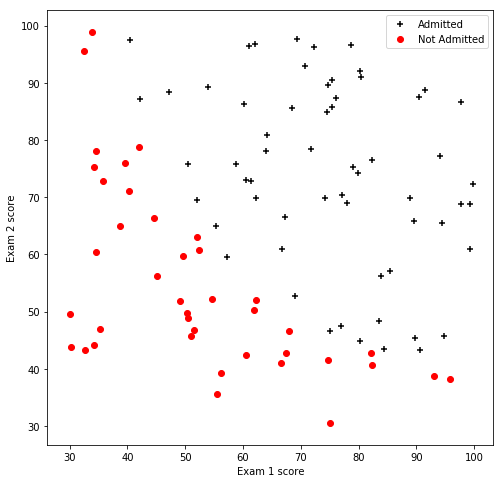

In [5]:
## Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.
data = np.genfromtxt('data/ex2data1.txt', delimiter=',')
x=data[:,0:-1]
y=data[:,-1]
(m, n) = x.shape;
X= np.c_[ np.ones((m,1)) ,x]
## ==================== Part 1: Plotting ====================
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')
plotData(x,y)

In [6]:
def sigmoid(z):
    return 1./(1+np.exp(-z))
def gradient(theta,X, y):
    m , n = X.shape
    y = y.reshape((m,1))
    theta = theta.reshape((n,1));
    h=sigmoid(np.dot(X,theta))
    grad = 1./m * np.dot(X.T, (h - y))
    return grad.flatten();

def costFunc(theta,X, y):
    h=sigmoid(np.dot(X,theta))
    m=X.shape[0]
    J = 1./m * ( -np.dot(y.T , np.log(h)) - np.dot((1 - y.T),np.log (1 - h)))
    return J

In [9]:
## ============ Part 2: Compute Cost and Gradient ============
#  In this part of the exercise, you will implement the cost and gradient
#  for logistic regression. You neeed to complete the code in 
#  costFunction.m
initial_theta = np.zeros((n + 1,1))
#print('Before:',initial_theta.shape,y.shape)
grad=gradient(initial_theta,X,y)
cost=costFunc(initial_theta,X,y)
print('Cost at initial theta (zeros): {:f}'.format(cost[0]))
print('Gradient at initial theta (zeros):')
print(grad)

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]


In [14]:
def plotDecisionBoundary(theta, X, y):
    x = X[:,1:3]
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([np.min(X[:,2])-2,  np.max(X[:,2])+2])
    # Calculate the decision boundary line
    plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])
    pos = y==1
    neg = y==0
    print('Scatter plot of training data')
    #X(pos, 1), X(pos, 2)
    plt.figure(figsize=(8, 8))
    plt.scatter(x[pos,0], x[pos,1],c='black',marker='+',label='Admitted')
    plt.scatter(x[neg,0], x[neg,1],c='red',marker='o',label='Not Admitted')
    plt.ylabel('Exam 2 score'); # Set the y-axis label
    plt.xlabel('Exam 1 score'); # Set the x-axis label
    plt.plot(plot_x, plot_y,label='Decision Boundary')
    l=plt.legend()
    l.set_zorder(20)
    plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Cost at theta found by fmin: 0.203498
theta:
[-25.16133284   0.2062317    0.2014716 ]
Scatter plot of training data


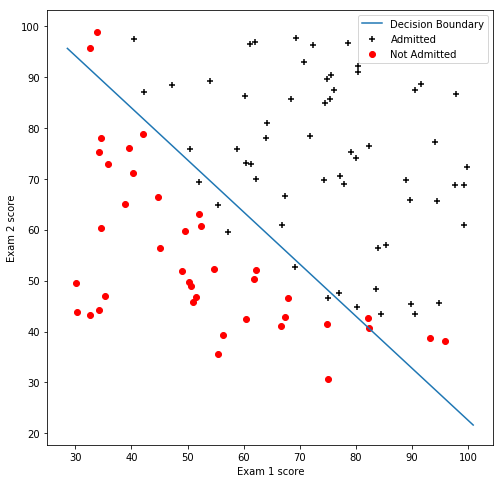

In [15]:
initial_theta = np.zeros((n + 1,1))
result = op.minimize(fun = costFunc,x0=initial_theta,args = (X, y),method = 'BFGS', 
                     jac = gradient,options={'disp': True})
#result = op.minimize(rosen, x0, method='BFGS', jac=rosen_der,options={'disp': True})

theta=result.x
cost_at_theta=result.fun


# Print theta to screen
print('Cost at theta found by fmin: {:f}'.format(cost_at_theta))
print('theta:'),
print(theta)
# Plot Boundary
plotDecisionBoundary(theta, X, y)

In [16]:
def probability(theta,X):
    return sigmoid(np.dot(X , theta))
def predict(theta,X):
    return sigmoid(np.dot(X , theta))>=0.5

In [17]:
## ============== Part 4: Predict and Accuracies ==============
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model
#  to predict the probability that a student with score 45 on exam 1 and 
#  score 85 on exam 2 will be admitted.
#
#  Furthermore, you will compute the training and test set accuracies of 
#  our model.
#
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = probability(theta,np.array([1,45,85]))
print('For a student with scores 45 and 85, we predict an admission probability of ', prob)
#Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: ', np.mean((p == y) * 100))



For a student with scores 45 and 85, we predict an admission probability of  0.7762907240588942
Train Accuracy:  89.0
